# Loading Data 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook, tnrange
import os
from sklearn.preprocessing import LabelEncoder

#os.chdir("/content/drive/My Drive/Chartbusters/ChartbustersParticipantsData")
%matplotlib inline

In [2]:
train = pd.read_csv("Data_Train.csv")
test = pd.read_csv("Data_Test.csv")
print(train.shape)
print(test.shape)

(78458, 11)
(19615, 10)


In [3]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78458 entries, 0 to 78457
Data columns (total 11 columns):
Unique_ID     78458 non-null int64
Name          78458 non-null object
Genre         78458 non-null object
Country       78458 non-null object
Song_Name     78457 non-null object
Timestamp     78458 non-null object
Views         78458 non-null int64
Comments      78458 non-null int64
Likes         78458 non-null object
Popularity    78458 non-null object
Followers     78458 non-null int64
dtypes: int64(4), object(7)
memory usage: 6.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19615 entries, 0 to 19614
Data columns (total 10 columns):
Unique_ID     19615 non-null int64
Name          19615 non-null object
Genre         19615 non-null object
Country       19615 non-null object
Song_Name     19615 non-null object
Timestamp     19615 non-null object
Comments      19615 non-null int64
Likes         19615 non-null object
Popularity    19615 non-null object
Followers    

# Data Cleaning

In [4]:
train.Likes = (train.Likes.replace(r'[KM]+$', '', regex=True).astype(float) * \
   ....:           train.Likes.str.extract(r'[\d\.]+([KM]+)', expand=False)
   ....:             .fillna(1)
   ....:             .replace(['K','M'], [10**3, 10**6]).astype(int))

train.Popularity = (train.Popularity.replace(r'[KM]+$', '', regex=True).astype(float) * \
   ....:           train.Popularity.str.extract(r'[\d\.]+([KM]+)', expand=False)
   ....:             .fillna(1)
   ....:             .replace(['K','M'], [10**3, 10**6]).astype(int))

test.Likes = (test.Likes.replace(r'[KM]+$', '', regex=True).astype(float) * \
   ....:           test.Likes.str.extract(r'[\d\.]+([KM]+)', expand=False)
   ....:             .fillna(1)
   ....:             .replace(['K','M'], [10**3, 10**6]).astype(int))

test.Popularity = (test.Popularity.replace(r'[KM]+$', '', regex=True).astype(float) * \
   ....:           test.Popularity.str.extract(r'[\d\.]+([KM]+)', expand=False)
   ....:             .fillna(1)
   ....:             .replace(['K','M'], [10**3, 10**6]).astype(int))

In [5]:
# training Data 
train['Likes'] = train['Likes'].astype(int)
train['Popularity'] = train['Popularity'].astype(int)
train['Name'] = train['Name'].astype(str)
train['Genre'] = train['Genre'].astype(str)
train['Country'] = train['Country'].astype(str)

# testing Data
test['Likes'] = test['Likes'].astype(int)
test['Popularity'] = test['Popularity'].astype(int)
test['Name'] = test['Name'].astype(str)
test['Genre'] = test['Genre'].astype(str)
test['Country'] = test['Country'].astype(str)

In [6]:
train['Timestamp'] = pd.to_datetime(train['Timestamp'])
test['Timestamp'] = pd.to_datetime(test['Timestamp'])

In [7]:
# Converting into Datetime format both training and testing data
#train['Timestamp'] = pd.to_datetime(train['Timestamp'])
#test['Timestamp'] = pd.to_datetime(test['Timestamp'])

# Add columns to training and testing data
train['year'] = pd.DatetimeIndex(train['Timestamp']).year
train['month'] = pd.DatetimeIndex(train['Timestamp']).month
train['day'] = pd.DatetimeIndex(train['Timestamp']).day
train['hour'] = pd.DatetimeIndex(train['Timestamp']).hour

test['year'] = pd.DatetimeIndex(test['Timestamp']).year
test['month'] = pd.DatetimeIndex(test['Timestamp']).month
test['day'] = pd.DatetimeIndex(test['Timestamp']).day
test['hour'] = pd.DatetimeIndex(test['Timestamp']).hour

In [8]:
target = "Views"
target_value = train[target]
train.drop(["Views", "Unique_ID", "Song_Name", "Timestamp", "Name"], axis=1, inplace=True)
test.drop(["Unique_ID", "Song_Name", "Timestamp", "Name"], axis=1, inplace=True)

In [9]:
print(train.head())
print(test.head())

      Genre Country  Comments  Likes  Popularity  Followers  year  month  day  \
0  danceedm      AU         4    499          97     119563  2018      3   30   
1  danceedm      AU        17     49          17       2141  2016      6   20   
2  danceedm      AU        11    312          91      22248  2015      8    5   
3    rbsoul      AU         2   2400          76     393655  2017      8    6   
4  danceedm      AU        81   3031         699     201030  2016      9   17   

   hour  
0    15  
1     5  
2    17  
3    23  
4    20  
       Genre Country  Comments  Likes  Popularity  Followers  year  month  \
0  all-music      AU        26   5428         118       2568  2019      2   
1   danceedm      AU        18    738         195     155645  2015      9   
2   danceedm      AU        18    386          96      29446  2013      9   
3  all-music      AU         1    388          19     799410  2007      8   
4       rock      AU         0     79           1          2  2018  

In [10]:
target_value.head()

0     14017
1      1918
2      9668
3    113036
4    110024
Name: Views, dtype: int64

In [11]:
target_value = pd.DataFrame(target_value, columns=['Views'])

In [12]:
print("Total number of unique entries are {}".format(train['year'].nunique()))
print(train['year'].unique())

Total number of unique entries are 31
[2018 2016 2015 2017 2012 2014 2011 2013 2009 2019 2005 2004 2010 1994
 1991 2002 2007 2001 2003 2008 2006 1999 2000 1996 1973 1995 1992 1990
 1997 1979 1986]


In [13]:
print(train['Country'].nunique())
print(train['Country'].unique())
train.drop(["Country"], axis=1, inplace=True)
test.drop(["Country"], axis=1, inplace=True)

1
['AU']


In [14]:
print(train['Genre'].nunique())
print(train['Genre'].unique())

21
['danceedm' 'rbsoul' 'all-music' 'trap' 'latin' 'electronic' 'deephouse'
 'hiphoprap' 'classical' 'ambient' 'pop' 'rock' 'reggaeton' 'country'
 'disco' 'alternativerock' 'dubstep' 'drumbass' 'metal'
 'folksingersongwriter' 'indie']


In [15]:
print(train.head())
print(test.head())

      Genre  Comments  Likes  Popularity  Followers  year  month  day  hour
0  danceedm         4    499          97     119563  2018      3   30    15
1  danceedm        17     49          17       2141  2016      6   20     5
2  danceedm        11    312          91      22248  2015      8    5    17
3    rbsoul         2   2400          76     393655  2017      8    6    23
4  danceedm        81   3031         699     201030  2016      9   17    20
       Genre  Comments  Likes  Popularity  Followers  year  month  day  hour
0  all-music        26   5428         118       2568  2019      2    1     9
1   danceedm        18    738         195     155645  2015      9    3    17
2   danceedm        18    386          96      29446  2013      9   18    16
3  all-music         1    388          19     799410  2007      8   14     0
4       rock         0     79           1          2  2018     10    8    16


In [16]:
train.drop(['day', 'hour'], axis=1, inplace=True)
test.drop(['day', 'hour'], axis=1, inplace=True)

In [17]:
print(train.head())
print(test.head())
print(target_value.head())

      Genre  Comments  Likes  Popularity  Followers  year  month
0  danceedm         4    499          97     119563  2018      3
1  danceedm        17     49          17       2141  2016      6
2  danceedm        11    312          91      22248  2015      8
3    rbsoul         2   2400          76     393655  2017      8
4  danceedm        81   3031         699     201030  2016      9
       Genre  Comments  Likes  Popularity  Followers  year  month
0  all-music        26   5428         118       2568  2019      2
1   danceedm        18    738         195     155645  2015      9
2   danceedm        18    386          96      29446  2013      9
3  all-music         1    388          19     799410  2007      8
4       rock         0     79           1          2  2018     10
    Views
0   14017
1    1918
2    9668
3  113036
4  110024


# Data Preprocession

## Preprocessing only for non-tree based algorithm

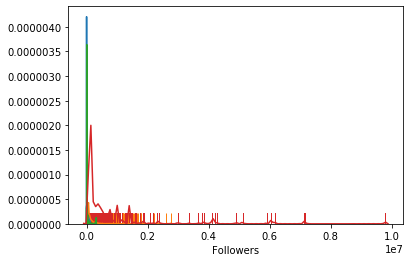

In [19]:
#fig, axs = plt.subplots(ncols=2, nrows=2)
sns.distplot(train['Comments'], hist=False, rug=True)
sns.distplot(train['Likes'], hist=False, rug=True)
sns.distplot(train['Popularity'], hist=False, rug=True)
sns.distplot(train['Followers'], hist=False, rug=True)

In [20]:
import matplotlib.pyplot as pl
def distribution(data, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    
    # Create figure
    fig = pl.figure(figsize = (11,5));

    # Skewed feature plotting
    for i, feature in enumerate(['Comments','Likes', 'Popularity', 'Followers']):
        ax = fig.add_subplot(1, 4, i+1)
        ax.hist(train[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Dist"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 2000))
        ax.set_yticks([0, 500, 1000, 1500, 2000])
        ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)

    fig.tight_layout()
    fig.show()

C:\Users\shaki\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


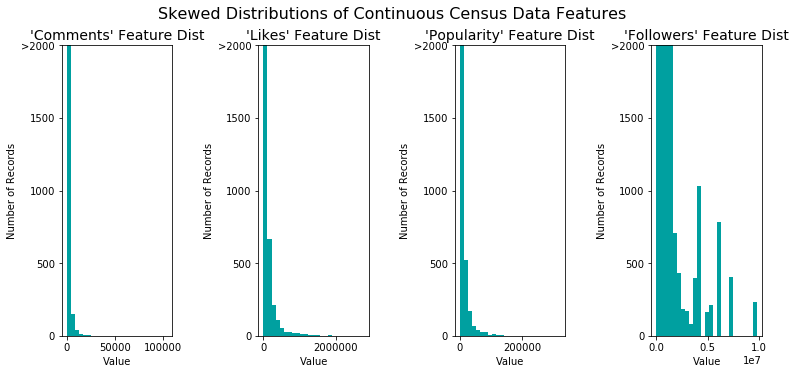

In [21]:
distribution(train)

C:\Users\shaki\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


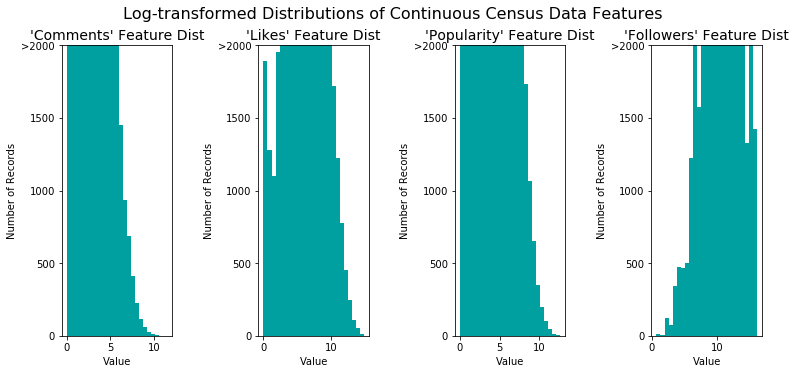

In [22]:
skewed = ['Comments', 'Likes', 'Popularity', 'Followers']
train[skewed] = train[skewed].apply(lambda x: np.log(x + 1))
test[skewed] = test[skewed].apply(lambda x: np.log(x+ 1 ))
# Visualize the new log distributions
distribution(train, transformed = True)

In [23]:
import matplotlib.pyplot as pl
def distribution(data, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    
    # Create figure
    fig = pl.figure(figsize = (11,5));

    # Skewed feature plotting
    for i, feature in enumerate(['Views']):
        ax = fig.add_subplot(1, 2, i+1)
        ax.hist(target_value[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Dist"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 2000))
        ax.set_yticks([0, 500, 1000, 1500, 2000])
        ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)

    fig.tight_layout()
    fig.show()

C:\Users\shaki\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


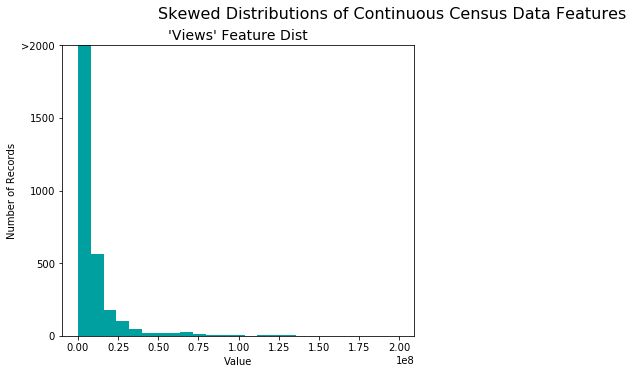

In [24]:
distribution(target_value)

C:\Users\shaki\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


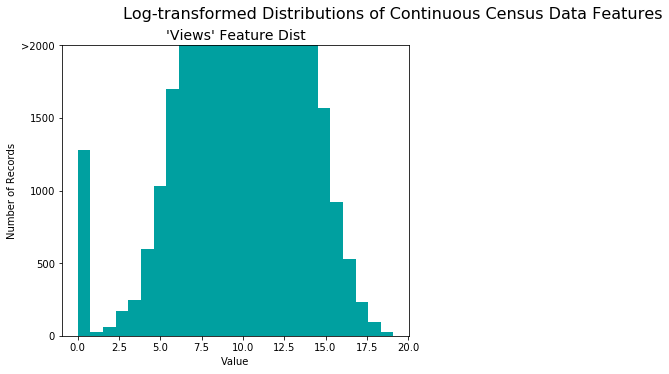

In [25]:
skewed = ['Views']
target_value[skewed] = target_value[skewed].apply(lambda x: np.log(x + 1))

distribution(target_value, transformed=True)

In [26]:
print(train.head())
print(test.head())
print(target_value.head())

      Genre  Comments     Likes  Popularity  Followers  year  month
0  danceedm  1.609438  6.214608    4.584967  11.691607  2018      3
1  danceedm  2.890372  3.912023    2.890372   7.669495  2016      6
2  danceedm  2.484907  5.746203    4.521789  10.010052  2015      8
3    rbsoul  1.098612  7.783641    4.343805  12.883233  2017      8
4  danceedm  4.406719  8.016978    6.551080  12.211214  2016      9
       Genre  Comments     Likes  Popularity  Followers  year  month
0  all-music  3.295837  8.599510    4.779123   7.851272  2019      2
1   danceedm  2.944439  6.605298    5.278115  11.955339  2015      9
2   danceedm  2.944439  5.958425    4.574711  10.290347  2013      9
3  all-music  0.693147  5.963579    2.995732  13.591630  2007      8
4       rock  0.000000  4.382027    0.693147   1.098612  2018     10
       Views
0   9.548097
1   7.559559
2   9.176680
3  11.635470
4  11.608463


## Preprocessing for tree based algorithm

In [28]:
label_encoding = LabelEncoder()
#catg = ['Genre', 'year', 'month']
train['Genre'] = label_encoding.fit_transform(train['Genre'])
#train['year'] = label_encoding.fit_transform(train['year'])
#train['month'] = label_encoding.fit_transform(train['month'])

test['Genre'] = label_encoding.fit_transform(test['Genre'])
#test['year'] = label_encoding.fit_transform(test['year'])
#test['month'] = label_encoding.fit_transform(test['month'])
#train['Genre'] = label_encoding.transform(train['Genre'])

In [29]:
print(train.head(n=3))
print(test.head(n=3))

   Genre  Comments     Likes  Popularity  Followers  year  month
0      5  1.609438  6.214608    4.584967  11.691607  2018      3
1      5  2.890372  3.912023    2.890372   7.669495  2016      6
2      5  2.484907  5.746203    4.521789  10.010052  2015      8
   Genre  Comments     Likes  Popularity  Followers  year  month
0      0  3.295837  8.599510    4.779123   7.851272  2019      2
1      5  2.944439  6.605298    5.278115  11.955339  2015      9
2      5  2.944439  5.958425    4.574711  10.290347  2013      9


In [30]:
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train, 
                                                    target_value, 
                                                    test_size = 0.2, 
                                                    random_state = 123)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 62766 samples.
Testing set has 15692 samples.


# Applying Different algorithm

## sub_3_bs model

In [156]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(colsample_bytree=1, max_depth=5, min_child_weight=1, n_estimators=400)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
preds.shape

[22:59:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(15692,)

In [157]:
import sklearn
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

y_out = xg_reg.predict(test)
y_out = np.reshape(y_out, (-1,1))

RMSE: 653199.524651


## sub_12 best model

In [22]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(colsample_bytree=1, max_depth=5, min_child_weight=1, n_estimators=500)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
preds.shape

[09:31:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(15692,)

In [23]:
import sklearn
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

y_out = xg_reg.predict(test)
y_out = np.reshape(y_out, (-1,1))

RMSE: 652720.452490


In [158]:
y_out = pd.DataFrame(data=y_out, columns=['Views'])

In [159]:
t1 = pd.read_csv('Data_Test.csv')
fin = pd.concat([t1['Unique_ID'], y_out['Views']], axis=1, names=['Unique_ID', 'Views'])
fin.to_csv("result.csv")
res = pd.read_csv("result.csv", index_col=['Unique_ID'])
res.drop(['Unnamed: 0'], axis=1, inplace=True)
res.to_csv("result.csv")

## sub_11 2 best model

In [26]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(colsample_bytree=1, max_depth=5)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
preds.shape

[09:39:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(15692,)

In [27]:
import sklearn
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

y_out = xg_reg.predict(test)
y_out = np.reshape(y_out, (-1,1))

RMSE: 687064.042208


## RandomForest Algorithm

In [160]:
from sklearn.ensemble import RandomForestRegressor

In [161]:
model = RandomForestRegressor(n_estimators=200, random_state=0)
model.fit(X_train, y_train)

C:\Users\shaki\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [162]:
preds = model.predict(X_test)

In [163]:
predictions = model.predict(test)

In [165]:
import sklearn
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 768164.961457


In [47]:
y_out = pd.DataFrame(data=predictions, columns=['Views'])

## GradientBoostingAlgorithm

In [179]:
from sklearn.ensemble import GradientBoostingRegressor
grb=GradientBoostingRegressor(learning_rate=0.1,n_estimators=200, max_depth=5
                              ,subsample=0.8,
                              verbose=True,random_state=10)

In [180]:
grb.fit(X_train, y_train)

C:\Users\shaki\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss      OOB Improve   Remaining Time 
         1 11476674610981.4082 3840863089772.7930           20.09s
         2 9866672255542.0566 2406720072630.9277           19.69s
         3 8330430346923.1592 1738174885540.3906           19.16s
         4 6993864977081.2383 1214466522607.9082           18.32s
         5 5469402885722.8359 1416490844786.0049           17.89s
         6 4705869042506.9512 793548231609.7095           17.81s
         7 3931982905909.7578 557592720648.4448           17.47s
         8 3185043505855.1875 514952954257.7817           17.22s
         9 2494029947183.8403 562861864815.6255           17.37s
        10 2081111433765.3962 413652236944.8169           17.13s
        20 446882786325.4976 36216233868.0272           16.02s
        30 188417538675.2888  5458222840.5702           15.05s
        40 137242149572.8594    37777520.4012           14.10s
        50 113432768082.3768  -313756691.5271           12.90s
        60 101288279593.5180 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=10, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=True,
                          warm_start=False)

In [181]:
preds = grb.predict(X_test)
preds.shape

(15692,)

In [182]:
import sklearn
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

y_out = xg_reg.predict(test)
y_out = np.reshape(y_out, (-1,1))

RMSE: 694455.207721


# Submission

In [183]:
y_out = pd.DataFrame(data=y_out, columns=['Views'])

In [184]:
t1 = pd.read_csv('Data_Test.csv')
fin = pd.concat([t1['Unique_ID'], y_out['Views']], axis=1, names=['Unique_ID', 'Views'])
fin.to_csv("result.csv")
res = pd.read_csv("result.csv", index_col=['Unique_ID'])
res.drop(['Unnamed: 0'], axis=1, inplace=True)
res.to_csv("result.csv")